In [1]:
import parse_data.prepare_data as prepare_data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import globals
import data_strings
import analysis.player_scores as player_scores
import data_extraction.get_indices as get_indices
import analysis.wall_visibility_and_choice as wall_visibility_and_choice

### Getting proportion of score by each player in each session

In [2]:
data_folder = data_strings.DATA_FOLDER
json_filenames_all_social = data_strings.JSON_FILENAMES_SOCIAL
json_filenames_all_solo = data_strings.JSON_FILENAMES_SOLO

In [3]:
json_filenames = json_filenames_all_social

In [4]:
df, trial_lists = prepare_data.prepare_data(data_folder, json_filenames, combine=False)

filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\first_experiments_2409\240913\2024-09-13_11-31-00_YansuJerrySocial.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\second_experiments_2409\240927\2024-09-27_14-25-20_SaraEmilySocial.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\third_experiments_2410\241017\2024-10-17_14-28-40_ShamirAbigailSocial.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\fourth_experiments_2410\241017\2024-10-17_16-41-38_ZimoElsaSocial.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\fifth_experiments_241112\2024-11-12_13-31-14_KhadijaWendySocial.json
Loading complete.
Preprocessing complete.
filepath: D:\Users\Tom\OneDrive\PhD\SWC\data\sixth_experiments_241112\2024-11-12_15-23-24_Franc

In [5]:
proportion_score_array = player_scores.proportion_score_sessions_df(trial_lists)

In [6]:
proportion_score_array

array([[0.42406312, 0.57593688],
       [0.37438424, 0.62561576],
       [0.42009132, 0.57990868],
       [0.33567416, 0.66432584],
       [0.37628866, 0.62371134],
       [0.79399142, 0.20600858],
       [0.492569  , 0.507431  ],
       [0.38533835, 0.61466165],
       [0.32718894, 0.67281106],
       [0.78571429, 0.21428571],
       [0.24919094, 0.75080906],
       [0.29604131, 0.70395869]])

In [7]:
proportion_wins_player_0_array = np.zeros(len(trial_lists))
for i in range(len(trial_lists)):
    trial_list = trial_lists[i]
    winners = get_indices.get_trigger_activators(trial_list)
    proportion_wins_player_0 = np.sum(winners == 0)/winners.size
    proportion_wins_player_0_array[i] = proportion_wins_player_0

In [8]:
proportion_wins_array = player_scores.proportion_wins_sessions(trial_lists)

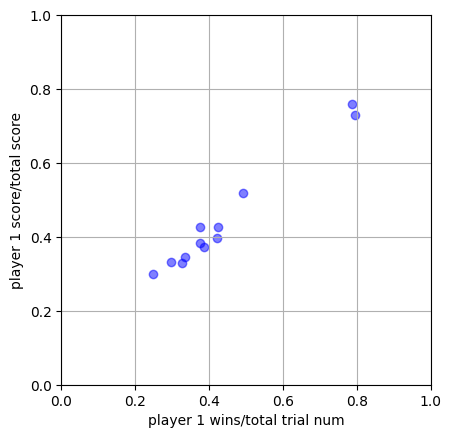

In [9]:
for i in range(len(trial_lists)):
    plt.scatter(proportion_score_array[i,0], proportion_wins_array[i,0], color='blue', alpha=0.5)



plt.gca().set_aspect(1)
plt.ylim(0, 1)
plt.xlim(0, 1)
plt.xlabel('player 1 wins/total trial num')
plt.ylabel('player 1 score/total score')
plt.grid(True)
plt.show()

In [10]:
probability_low_when_first_visible, _, _ = wall_visibility_and_choice.probability_first_wall_chosen_and_low_multiple_sessions_df(trial_lists)
ratio_probability_low_when_first_visible = probability_low_when_first_visible[:,0]/probability_low_when_first_visible[:,1]

d:\tom\documents\swc\repos\octagon_analysis\trajectory_analysis\trajectory_vectors.py:319: RuntimeWarning: invalid value encountered in scalar divide
  cosine_similarity_this_wall = dot_product[wall_num]/(player_to_alcove_vector_norms[wall_num] * player_vector_norm)
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:45: RuntimeWarning: Mean of empty slice
  return np.argmax(np.nanmean(cosine_similarity_trajectory, axis=1))
d:\tom\documents\swc\repos\octagon_analysis\analysis\loser_inferred_choice.py:146: RuntimeWarning: Mean of empty slice
  highest_alignment_val = np.max(np.nanmean(cosine_similarity_trajectory, axis=1))


In [17]:
probability_low_when_first_visible

array([[0.70588235, 0.72222222],
       [0.84210526, 0.5       ],
       [0.45833333, 0.79411765],
       [0.7173913 , 0.63829787],
       [0.71428571, 0.63157895],
       [0.58064516, 0.75      ],
       [0.74418605, 0.5       ],
       [0.65517241, 0.55263158],
       [0.52173913, 0.73333333],
       [0.41025641, 0.84615385],
       [0.71111111, 0.26415094],
       [0.73333333, 0.41463415]])

In [11]:
ratio_probability_low_when_first_visible

array([0.97737557, 1.68421053, 0.57716049, 1.12391304, 1.13095238,
       0.77419355, 1.48837209, 1.18555008, 0.71146245, 0.48484848,
       2.69206349, 1.76862745])

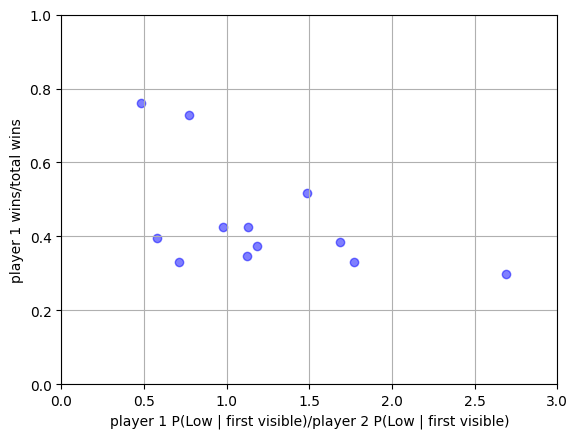

In [16]:
plt.scatter(ratio_probability_low_when_first_visible, proportion_wins_array[:,0], color='blue', alpha=0.5)




plt.ylim(0, 1)
plt.xlim(0, 3)
plt.xlabel('player 1 P(Low | first visible)/player 2 P(Low | first visible)')
plt.ylabel('player 1 wins/total wins')
plt.grid(True)
plt.show()

In [13]:
ratio_probability_low_when_first_visible.size, proportion_score_array.shape[0]

(12, 12)

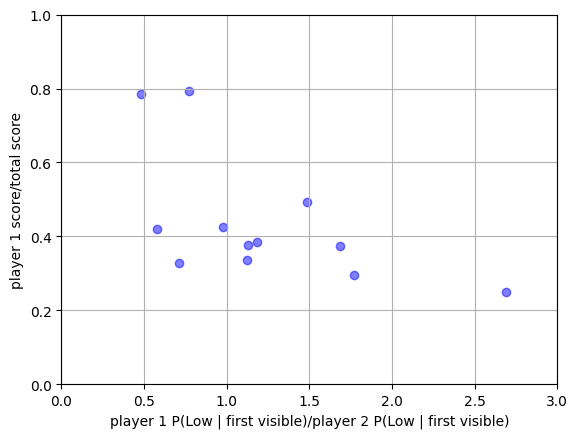

In [19]:
plt.scatter(ratio_probability_low_when_first_visible, proportion_score_array[:,0], color='blue', alpha=0.5)


plt.ylim(0, 1)
plt.xlim(0, 3)
plt.xlabel('player 1 P(Low | first visible)/player 2 P(Low | first visible)')
plt.ylabel('player 1 score/total score')
plt.grid(True)
plt.show()